# Controllability of complex networks

Paper by Yang-Yu Liu, Jean-Jacques Slotine & Albert-László Barabási

### Lucas Machado Moschen

In [2]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

The ultimate understanding of the natural and technological system can be observed when we can control them, that is, with suitable choice of the inputs we can drive the system from a initial point to a desirable in a finite time. This article treats to study tools of controllability of complex directed networks. Some analytical tools are developed as I will present in this notebook. We know that real systems are generally driven by nonlinear processes. However theses systems are structurally similar to linear systems. 
$$
\frac{dx(t)}{dt} = Ax(t) + Bu(t),
$$
where $x(t) \in \mathbb{R}^n$ indicates the state of the $n$ nodes at time $t$ and $u(t) \in \mathbb{R}^m$ is the input vector that controls the system. Consider the graph $G(A,B)$ with the nodes being the state variables and the iinput variables. If the state $x_j$ points to $x_i$, we denote $j \to i$. 

$A := (a_{ij})_{n \times n}$, such that $a_{ij} = \begin{cases} 0, &\text{if }j \not \rightarrow i \\ 
> 0, &\text{if }j \rightarrow i \text{ is excitatory} \\ 
< 0, &\text{if }j \rightarrow i \text{ is inhibitory}\end{cases}$

$B$ has the same structure as $A$, but each $b_{ij}$ indicates if the control $j$ points to the state $i$. 

#### First example NetworkX

$$
A = \begin{bmatrix}
0 & 0 & 0 \\
a_{21} & 0 & 0 \\
a_{31} & 0 & 0 \\
\end{bmatrix}
$$

and 

$$
B = \begin{bmatrix}
b_{11} \\
0 \\
0 \\
\end{bmatrix}
$$

In [59]:
G = nx.DiGraph()
G.add_nodes_from([
    ('x1', {"type": "state"}),
    ('x2', {"type": "state"}), 
    ('x3', {"type": "state"}),
    ('u1', {"type": "control"})
])
G.add_edges_from([
    ('x1', 'x2'),
    ('x1', 'x3'),
    ('u1', 'x1')
])

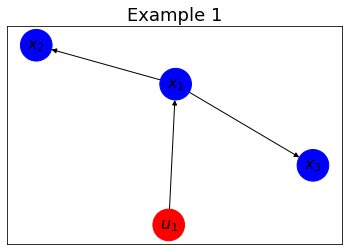

In [63]:
mapping = {'state': 'blue', 'control': 'red'}
colors = [mapping[node[1]['type']] for node in G.nodes.data()]
labels = {'x1': r"$x_1$", 'x2': r"$x_2$", 'x3': r"$x_3$", 'u1': r"$u_1$"}

nc = nx.draw_networkx(G, node_color=colors, labels = labels, node_size = 1000,
                      font_size = 16)
plt.title('Example 1', fontsize = 18)
plt.show()

The set of controllable pairs $(A,B)$ is open and dense in the space of all pairs, that is, if $(A_0, B_0)$ is not controllable, for all $\epsilon > 0$, there exists $(A,B)$ controllable such that 
$$||A - A_0|| < \epsilon \text{ and } ||B - B_0|| < \epsilon$$

The state nodes connected to the input variables (control variables) are the **controlled nodes**. When controlled node don't share input nodes, we call them **Driver Nodes**.

#### Example 2

In [65]:
G = nx.DiGraph()
states = [('x' + str(i), {"type": "state"}) for i in range(1,21)]
controls = [('u' + str(i), {"type": "control"}) for i in range(1,4)]
G.add_nodes_from(states)
G.add_nodes_from(controls)
G.add_edges_from([
    ('x1', 'x2'),
    ('x2', 'x3'),
    ('x3', 'x4'),
    ('x1', 'x5'),
    ('x5', 'x6'),
    ('x6', 'x7'),
    ('x7', 'x8'),
    ('x8', 'x5'),
    ('x1', 'x9'),
    ('x9', 'x10'),
    ('x10', 'x11'),
    ('x11', 'x12'),
    ('x12', 'x9'),
    ('x2', 'x6'),
    ('x2', 'x13'),
    ('x13', 'x14'),
    ('x14', 'x13'),
    ('x15', 'x2'),
    ('x15', 'x16'),
    ('x16', 'x17'),
    ('x17', 'x15'),
    ('x15', 'x10'),
    ('x18', 'x19'),
    ('x18', 'x20'),
    ('u1', 'x1'), 
    ('u1', 'x5'), 
    ('u1', 'x9'),
    ('u2', 'x18'), 
    ('u3', 'x19')
])

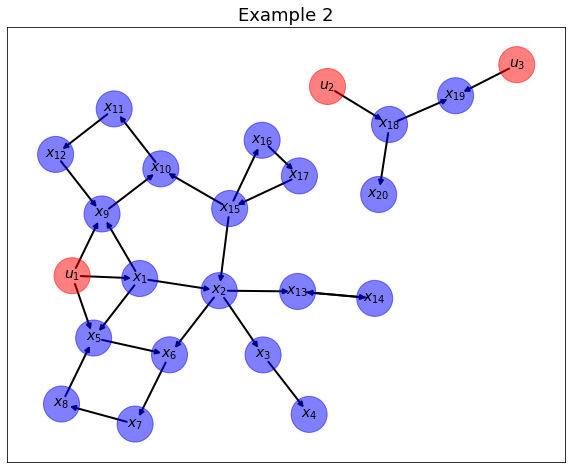

In [66]:
fig, ax = plt.subplots(figsize = (10,8))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato", root = 'u1')
mapping = {'state': 'blue', 'control': 'red'}
colors = [mapping[node[1]['type']] for node in G.nodes.data()]
labels = {n: r"${}_{{{}}}$".format(n[0],n[1:]) for n in G.nodes()}

# nodes
options = {"node_size": 1300, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, node_color=colors, **options)

# edges
nx.draw_networkx_edges(
    G,
    pos,
    width=2,
    edge_color="black",
)

# labels
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title('Example 2', fontsize = 18)
plt.show()

In this example the nodes $x_1, x_5, x_9, x_{18}, x_{19}$ are controlled nodes and $x_1, x_{18}, x_{19}$ are driver nodes. The system $(A,B)$ are **structurally controllable** if it's possible to choose the non-zero parameters in A and B such that $(A,B)$ is controllable. To control a system we need to find the **minimum number of the driver nodes**, which is sufficient to control these system. We denote this set as $N_D$. Observe that the number of driver nodes is equal to the number of controls.

**Kalman Controlability:** The system is controllable if Controllability matrix 

$$C = (B, AB, ..., A^{N-1}B)$$
is full rank, that is, $rank(C) = N$. 

However in real systems we have two problems: the estimation of $A$ is very difficult and sometimes we do not know these values; and calculation of the rank of this matrix is time consuming. For that reason it was introduced the idea of structurally controllability. 

## Graph theory: important definitions

A graph is **spanned** by a subgraph if both have the same number of vertices, but the subset possess only a subset of the edges. 

An **elementary path** is a sequence of distinct vertices $\{v_1, ..., v_k\}$ such that, for all $1 \le i < k$ we have that $(v_i, v_{i+1})$ is an edge of the graph. If $v_k = v_1$, it's an elementary cycle. 

A state vertex is **inaccessible** iff there are no directed paths reaching the state from the input vertices. 

The graph $G(A,B)$ contains a **dilation** iff there is a subset $S$ of the state vertices such that $|T(S)| < |S|$, where $T(S) = \{v_j \in G|(v_j, v_i) \in E(G), v_i \in S\}$, i.e, the set of the nodes that start edges with end in a vertex in $S$. 

A **stem** is an elementaty path originating from an input vertex. In Example 3, $u_1, x_1, ..., x_4$ forms a stem. 

A **bud** is an elementary cycle and an additional edge that ends, but not begins, in a vertex of the cycle. In the Example 2, $\{x_1, x_9, x_{10}, x_{11}, x_{12}\}$ is a bud.  We call this aditional edge **distinguished edge**.

A set of vertex-disjoint stems and elementary cycles such that the union of all the stems and all the cycles spans G(A, B) is called a **U-rooted factorial conection**. It exists if and only if there are no dilations. 

A **cactus** is a subgraph defined recursively as follows. A stem is a cactus.
Given a stem $S_0$ and buds $B_1 , B_2 , · · · , B_l$ , then $S_0 \cup B_1 \cup B_2 \cup ... \cup B_l$ is a cactus if for every $i \in \{1,...,l\}$, the initial vertex of the distinguished edge of $B_i$ is not the top of $S_0$ and is the only vertex belonging at the same time to $B_i$ and $S_0 \cup B_1 \cup B_2 \cup ... \cup B_{i−1}$. A set of vertex-disjoint cactus is called a **cacti**.

## Theorem 1 (Lin’s Structural Controllability Theorem)

The following three statements are equivalent:

1. A linear control system (A, B) is structurally controllable.

2. i) The digraph G(A, B) contains no inaccessible nodes.
   ii) The digraph G(A, B) contains no dilation.

3. G(A, B) is spanned by cacti.